# Worksheet 3 - Scientific Visualization MVE080/MMG640
## Uncertainty and geospatial data

Name: _Your Name_

This is the third worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

The below loads the packages required for this homework.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
import scipy.stats as st
# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15, 16 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

During Lecture 5 we visualized uncertainty for point estimates using i) graded error-bars and ii) fuzziness (slide 6). Briefly describe when each kind of visual is suitable.

### Answer 1.1
Errorbars:
Errorbars are useful for alot of things, in this context they are suitible for showing the uncertainties in the sample mean. However they have a drawback in that they assume that the underlying data is Gaussian. Confidence intervals, standard deviation and standard error are all common applications of errorbars.


Fuzziness:
Confidence strips are better at conveying how probable different values are than errobar. However they are worse at conveying confidence intervals and wheter or not values are statistically significant. They are also more useful than errorbars when the underlying data isn't Gaussian, since they represent probabilities.

### Question 1.2

Another way to visualize uncertainty is a **Hypothetical outcome plots** (Chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/)). Briefly describe the key features of such a visual.

### Answer 1.2
The purpose of HOPs are to give the reader a feel of the probabilities rather than reading them from either text of a static plot. Thus it is very important that you as a designer validate that the right conclusion is shown. Either the designer can use a large amount of outcomes so that the bias diminishes or that the designer picks outcomes so that they reflect the complete dataset.

### Question 1.3

Often when doing regression (fitting a curve to data) we want to do use the regression model to make predictions. What is important to think about when visualizing model predictions?

### Answer 1.3
The most important thing to think about when visualizing predictions is to clearly show what parts of the plots are the actial data and which points are predictions. Otherwise it is very easy for readers to draw the wrong conclusions from the plots. 

### Question 1.4

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.4
The Mercator projection preserves shapes and local direction, however it does not preserve size, which grows with the latitude. Thus it would be irresponsible to use this projection when comparing land area for different countries.

### Question 1.5

A common form of visualization for maps is the Choropleth map (e.g slide 17 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.5
The Chloropleth map is a way of coloring a map to indicate summary of the data. When constructing these maps it is important to remeber that they function best when visualising densities since a single value for a portion of a map is seldom representative. It is also important to think about the sizes of the portions of the map that are colored, since a large area will dominate the viewers perspective. 

## Uncertainty  

For this part reading chapter 16 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 2.1

Coffee is undoubtedly a popular beverage (albeit inferior to tea :). On Canvas I have uploaded a dataset with ratings for coffee beans from six different countries. 

Here we are interested in identifying which country on average has the best quality beans. Create two plots, where in i) you plot the mean ($\mu$) and standard deviation for each country (using errorbars), and ii) where you plot the mean and standard error of the mean estimate. Briefly discuss the drawbacks with error-bars. 

As a reminder. For country $j$ with coffee ratings $x^{(j)}_1, \ldots, x^{(j)}_{n_j}$ the sample mean is given by 

$$
\hat{\mu}^{(j)} = \frac{1}{n_j}\sum_{i = 1}^{n_j} x_i^{(j)},
$$

sample standard deviation by

$$
\hat{\sigma}^{(j)} = \sqrt{\frac{1}{n - 1} \sum_{i = 1}^{n_j} (x_i^{(j)} - \hat{\mu}^{(j)})^2},
$$

and sample standard error for $\hat{\mu}^{(j)}$

$$
\hat{\sigma}_{\hat{\mu}^{(j)}} = \frac{\hat{\sigma}^{(j)}}{\sqrt{n}}
$$

and a confidence interval with confidence level $1 - \alpha$ is given by;

$$
\hat{\mu}^{(j)} \pm t_{n-1}(1 - \alpha / 2) \hat{\sigma}_{\hat{\mu}^{(j)}}
$$

where $t_{n-1}$ is the t-distribution with $n-1$ degree of freedom. For confidence level $1 - \alpha=0.95$ and $n = 30$ we have that $t_{29}(1 - 0.025) \approx 2.05$.

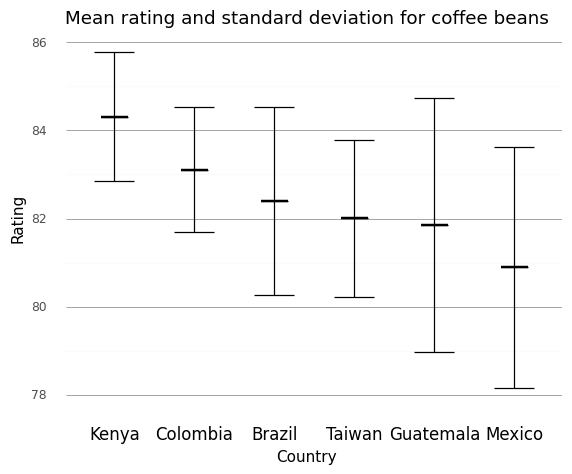

In [371]:
# Insert code here for visual 1
df_coffee = pd.read_csv('Coffee_tidy.csv')
countries = df_coffee['country_of_origin'].unique()
df_sum = pd.DataFrame(countries, columns=['country_of_origin'])

# Create dataframe with summary statistics
for c in countries:
    tmp = df_coffee.query('country_of_origin == @c')
    n_points = tmp.shape[0]
    mean = tmp['total_cup_points'].mean()
    std = tmp['total_cup_points'].std()
    df_sum.loc[df_sum['country_of_origin']==c, 'num_evals'] = n_points
    df_sum.loc[df_sum['country_of_origin']==c, 'mean'] = mean
    df_sum.loc[df_sum['country_of_origin']==c, 'std'] = std
    df_sum.loc[df_sum['country_of_origin']==c, 'mean_ste'] = std/np.sqrt(n_points)

df_sum = df_sum.sort_values('mean', ascending=False)
order = df_sum['country_of_origin'].unique()
# print(df_sum)
# Plot time
p = (ggplot(df_sum, aes('country_of_origin', 'mean', ymax='mean + std', ymin='mean - std'))
    + geom_crossbar(aes(y='mean',ymin='mean', ymax='mean'), width=0.33)
    + geom_errorbar(position='identity')
    + scale_x_discrete(limits=order)
    + labs(x='Country', y='Rating', title='Mean rating and standard deviation for coffee beans')
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(),
            panel_grid_major_y=element_line(color='gray', size=0.5),
            axis_text_x = element_text(color="black", size=12))     
    )
print(p)
# Remember to print the visual 

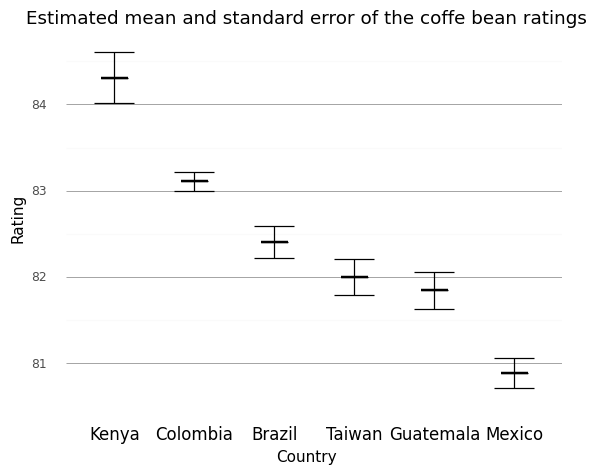

In [3]:
# Insert code here for visual 2

p = (ggplot(df_sum, aes('country_of_origin', 'mean', ymax='mean + mean_ste', ymin='mean - mean_ste'))
    + geom_crossbar(aes(y='mean',ymin='mean', ymax='mean'), width=0.33)
    + geom_errorbar(position='identity')
    + scale_x_discrete(limits=order)
    + labs(x='Country', y='Rating', title='Estimated mean and standard error of the coffe bean ratings')
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(),
            panel_grid_major_y=element_line(color='gray', size=0.5),
            axis_text_x = element_text(color="black", size=12))     
    )
print(p)
# Remember to print the visual 

In [370]:
# Gave up trying to use some smart loop to get the stats and just hard coded

stats99 = df_coffee.groupby(['country_of_origin'])['total_cup_points'].agg(['mean', 'sem'])
stats90 = df_coffee.groupby(['country_of_origin'])['total_cup_points'].agg(['mean', 'sem'])
stats80 = df_coffee.groupby(['country_of_origin'])['total_cup_points'].agg(['mean', 'sem'])

# z values [99:2.675, 90:1.645, 80:1.282]


stats99['ci_hi'] = stats99['mean'] + 2.576* stats99['sem']
stats99['ci_lo'] = stats99['mean'] - 2.576* stats99['sem']
stats99["ci_percent"] = ["99%", "99%", "99%", "99%", "99%", "99%"]

stats90['ci_hi'] = stats90['mean'] + 1.645* stats90['sem']
stats90['ci_lo'] = stats90['mean'] - 1.645* stats90['sem']
stats90["ci_percent"] = ["90%", "90%", "90%", "90%", "90%", "90%"]

stats80['ci_hi'] = stats80['mean'] + 1.282* stats80['sem']
stats80['ci_lo'] = stats80['mean'] - 1.282* stats80['sem']
stats80["ci_percent"] = ["80%", "80%", "80%", "80%", "80%", "80%"]

stats = pd.concat([stats99, stats90, stats80])
stats.reset_index(inplace=True)

stats = stats.assign(ci_percent = pd.Categorical(stats["ci_percent"], 
                                    categories=["99%", "90%", "80%"]))

stats = stats.assign(country_of_origin = pd.Categorical(stats["country_of_origin"], 
                                        categories=order))

print(stats)

   country_of_origin       mean       sem      ci_hi      ci_lo ci_percent
0             Brazil  82.405909  0.185645  82.884131  81.927687        99%
1           Colombia  83.106557  0.104472  83.375678  82.837437        99%
2          Guatemala  81.846575  0.214453  82.399005  81.294144        99%
3              Kenya  84.309600  0.291947  85.061654  83.557546        99%
4             Mexico  80.890085  0.178516  81.349942  80.430228        99%
5             Taiwan  82.001333  0.204556  82.528268  81.474398        99%
6             Brazil  82.405909  0.185645  82.711296  82.100523        90%
7           Colombia  83.106557  0.104472  83.278414  82.934701        90%
8          Guatemala  81.846575  0.214453  82.199350  81.493800        90%
9              Kenya  84.309600  0.291947  84.789852  83.829348        90%
10            Mexico  80.890085  0.178516  81.183743  80.596426        90%
11            Taiwan  82.001333  0.204556  82.337827  81.664839        90%
12            Brazil  82.

When using errorbars it is impossible to:
1. Without specifying in advance the number of points used for the estimates.
2. Without specifying what the errorbars are, often through convoluted captions, it is impossible for the reader to know exactly what they represents. Especially if the reader hasn't read a lot of literature in the field.
3. Knowing how the datapoints used actually was distributed since errorbars assume that the data is Gaussian. 

### Question 2.2

Now using the coffee dataset visualize the uncertainty in the mean estimate using i) graded error-bars (here plot confidence intervals with 80%, 90% and 99% confidence) and ii) fuzzy error bars (as in slide 6 in Lecture 5).

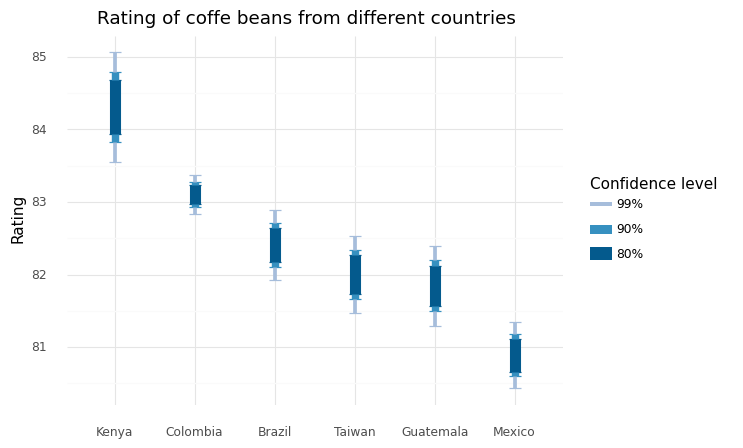

In [367]:
# Insert code here for visual 1

g = (ggplot(stats, aes(x = "country_of_origin")) 
    + geom_errorbar(aes(ymin = 'ci_lo', ymax = 'ci_hi', color='ci_percent'), width=0.15)
    + geom_errorbar(aes(ymin = 'ci_lo', ymax = 'ci_hi', size='ci_percent', color='ci_percent', width=0))
    + scale_color_manual(values = ["#a6bddb", "#3690c0", "#045a8d"], 
                         name = "Confidence level")
    + scale_size_manual(values = [1.5, 3.0, 4.5], name = "Confidence level") 
    + scale_x_discrete(limits=order)
    + labs(x='', y='Rating', title='Rating of coffe beans from different countries')
    + theme_minimal()
    )

print(g)

# Remember to print the visual 

99%


C:\Users\admin\miniconda3\envs\MVE080\lib\site-packages\plotnine\utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
C:\Users\admin\miniconda3\envs\MVE080\lib\site-packages\plotnine\utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


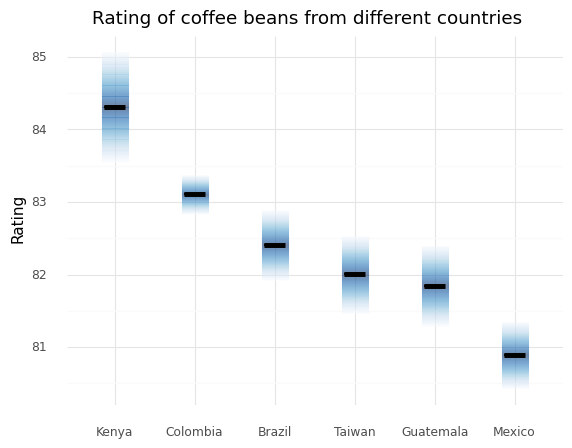

<ggplot: (156220700426)>

In [386]:
# Insert code here for visual 2
a = '99%'
print(a)
data_fuzzy_tmp = stats.query("ci_percent == @a")
# mean_df = stats.query('ci_percent == 80%')
line_color = np.concatenate([np.linspace(0, 50, 50), np.linspace(50, 0, 50)])
data_fuzzy = pd.DataFrame()

for i in range(data_fuzzy_tmp.shape[0]):
    val_min, val_max = data_fuzzy_tmp["ci_lo"].values[i], data_fuzzy_tmp["ci_hi"].values[i]
    df_tmp = pd.DataFrame({"val_line" : np.linspace(val_min, val_max, 100), 
                        "color_line" : line_color}) 
    df_tmp["country_of_origin"] = data_fuzzy_tmp["country_of_origin"].values[i]
    data_fuzzy = pd.concat([data_fuzzy, df_tmp])

    
p = (ggplot(data_fuzzy, aes("country_of_origin", "val_line"))
    + geom_line(aes(color="color_line"), size=11.0, alpha=0.7)
    + geom_crossbar(data=df_sum, mapping=aes(x='country_of_origin', y = "mean", ymin = "mean", ymax = "mean"), width=0.26, size=1.0)
    + scale_color_cmap("Blues")
    + labs(x = "", y = "Rating", title = "Rating of coffee beans from different countries")
    + theme_minimal()
    + theme(legend_position="none")
    + scale_x_discrete(limits=order) 
#     + theme(panel_grid_major_x=element_blank(),
#           axis_text_x = element_text(size=12))
    )
p
# Remember to print the visual 

### Question 2.3

Frequency graphs are a powerful tool for visualizing probabilities. On Canvas I have uploaded an image of such a graph, please recreate it (you do not have to recreate the colors perfectly). The figure might look strange when rendered in Jupyter (then it is better to save it to disk and see how it looks like),

     x    y    c
0  1.0  1.0  0.0
1  2.0  1.0  0.0
2  3.0  1.0  0.0
3  4.0  1.0  0.0
4  5.0  1.0  0.0


C:\Users\admin\miniconda3\envs\MVE080\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7 x 7 in image.
C:\Users\admin\miniconda3\envs\MVE080\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: jonas_dot


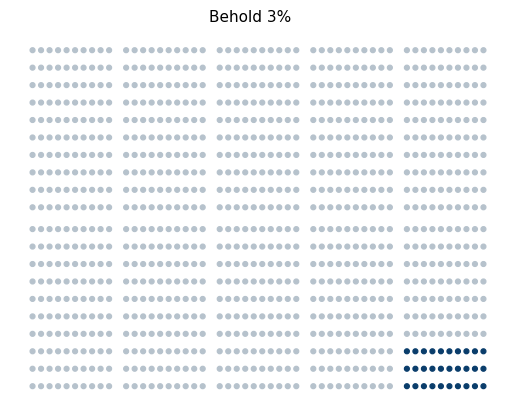

In [209]:
# Insert code here 
cp = ["#B6C2CC", "#0A3D6B"]

# Image is 20x50
x = np.linspace(1,50,50)
y = np.linspace(1,20,20)
xx,yy = np.meshgrid(x,y)

xx = np.reshape(xx, (-1,))
yy = np.reshape(yy, (-1,))

color = np.zeros((1000,))
color[np.where((xx>40) & (yy<4))] = 1
xx[np.where((xx>10))] +=1
xx[np.where((xx>21))] +=1
xx[np.where((xx>32))] +=1
xx[np.where((xx>43))] +=1
yy[np.where((yy>10))] +=0.25

coords = {'x':xx, 'y':yy, 'c':color}
dfc = pd.DataFrame(coords)
dfc = dfc.assign(c = pd.Categorical(dfc['c']))
print(dfc.head())

p = (ggplot(dfc, aes('x', 'y', color='c'))
    + geom_point(show_legend=False)
    + labs(x='', y='', title='Behold 3%')
    + scale_color_manual(values=cp)
    + theme_void()
#     + theme(axis_text=element_blank()) 
    )
p.save("jonas_dot", width=7, height=7, dpi=300)
print(p)
# Remember to print the visual 

## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (you should be able to install it via the Anaconda navigator).

### Question 3.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colors (here you can represent countries without Starbucks as white) which show the number of Starbucks stores in different Asian countries. See code below for how to get the Asian map.

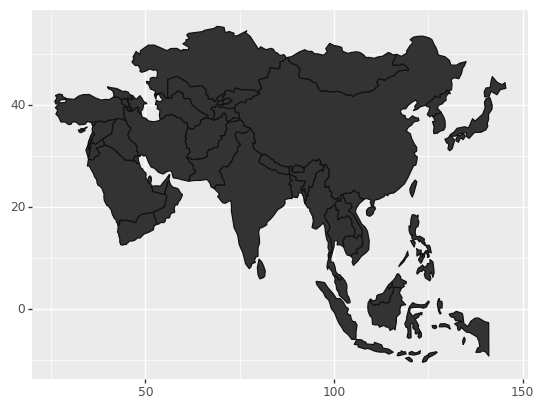

<ggplot: (156181261602)>

In [210]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(asia)
    + geom_map())

In [251]:
# Insert code here for visual 1
col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]

df = pd.read_csv('Starbucks_data.csv')

countries = df['Country'].unique()

for i in range(df.shape[0]):
    entry = df.loc[i,'Timezone']
    tzc_c = entry.split('/') # Timezone + continent split from country
    tzc = tzc_c[0] # timezone continent
    tzc = tzc.split(' ')
    continent = tzc[1]
    df.loc[i, 'Continent'] = continent


C:\Users\admin\miniconda3\envs\MVE080\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


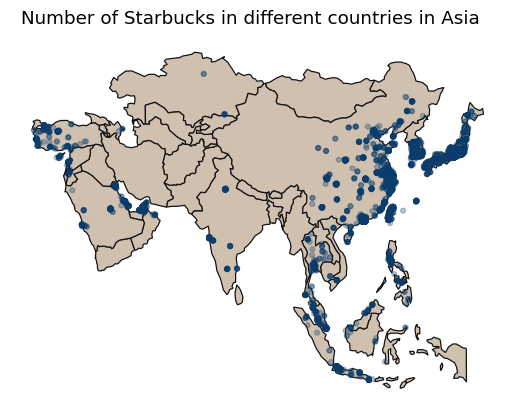

<ggplot: (156220435071)>

In [307]:
# Insert code here for visual 1

df_asia = df[df['Continent']=='Asia']
# print(df_asia) # 2 werid otliers at about (55, 65) (lat, long)
# Weird outliers from russia that came through in ekaterinburg, yekaterinburg, tyumen removing these
df_asia = df_asia.drop(df_asia[df_asia['iso_a3']=='RUS'].index)

p = (ggplot(df_asia)
    + geom_map(data=asia, fill=col_highlight[0])
    + geom_point(data=df_asia, mapping=aes(x='Longitude', y='Latitude'), color=col_highlight[1], alpha=0.3)
    + labs(x='', y='', title='Number of Starbucks in different countries in Asia') 
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
    )
p

# Remember to print the visual

## Comments
I thought the points centered on the countries with size relative to #starbucks / area became hard to interpret with the smaller countries so I choose this visual instead. While it isn't perfect I think that it became easier to discern what countries have starbucks. Hope that is okay :)

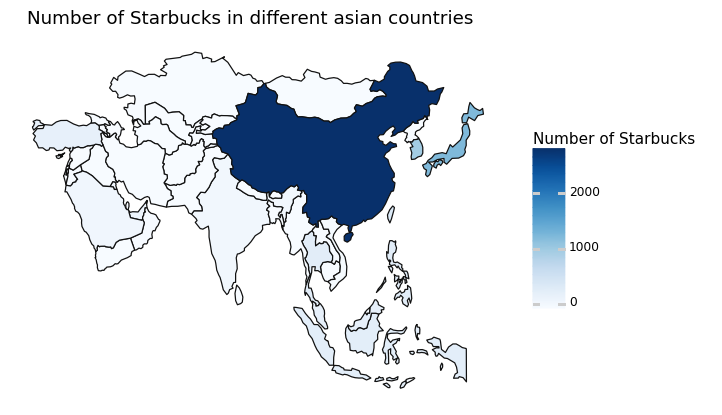

<ggplot: (156214480493)>

In [339]:
# Insert code here for visual 2

# We can use iso_a3 to color
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]


isos = df_asia['iso_a3'].unique()
dfa_sum = pd.DataFrame(isos, columns=['iso_a3'])

for iso in isos:
    tmp = df_asia.query('iso_a3==@iso')

    n_sb = tmp.shape[0]
    dfa_sum.loc[dfa_sum['iso_a3']==iso, 'count'] = n_sb
    
df_plot = asia.copy()

sb_isos = list(dfa_sum['iso_a3'])

for iso in df_plot['iso_a3'].unique():
    
    if iso in sb_isos:
        tmp = dfa_sum[dfa_sum['iso_a3']==iso]
        c = tmp['count'].values[0]
        df_plot.loc[df_plot['iso_a3']==iso, 'count'] = c
    else:
        df_plot.loc[df_plot['iso_a3']==iso, 'count'] = 0
        
df_plot['count_norm'] = (df_plot['count'] - df_plot['count'].mean())/ df_plot['count'].std()

# p = (ggplot(df_plot)
#     + geom_map(aes(geometry='geometry', fill='count_norm'))
#     + labs(x='', y='', title='Number of Starbucks in different asian countries')
#     + theme(panel_background=element_rect(fill = "white"), 
#             axis_ticks=element_blank(), 
#             axis_text=element_blank())
#     + scale_fill_cmap('Blues', name='Number of Starbucks')
#     )
# print(p)

g = (ggplot(df_plot)
    + geom_map(aes(geometry='geometry', fill='count'))
    + labs(x='', y='', title='Number of Starbucks in different asian countries')
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
    + scale_fill_cmap('Blues', name='Number of Starbucks')
    )
g
# Remember to print the visual 

## Question 3.2

On Canvas I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

See code below for how to get the world map (with an appropriate projection).

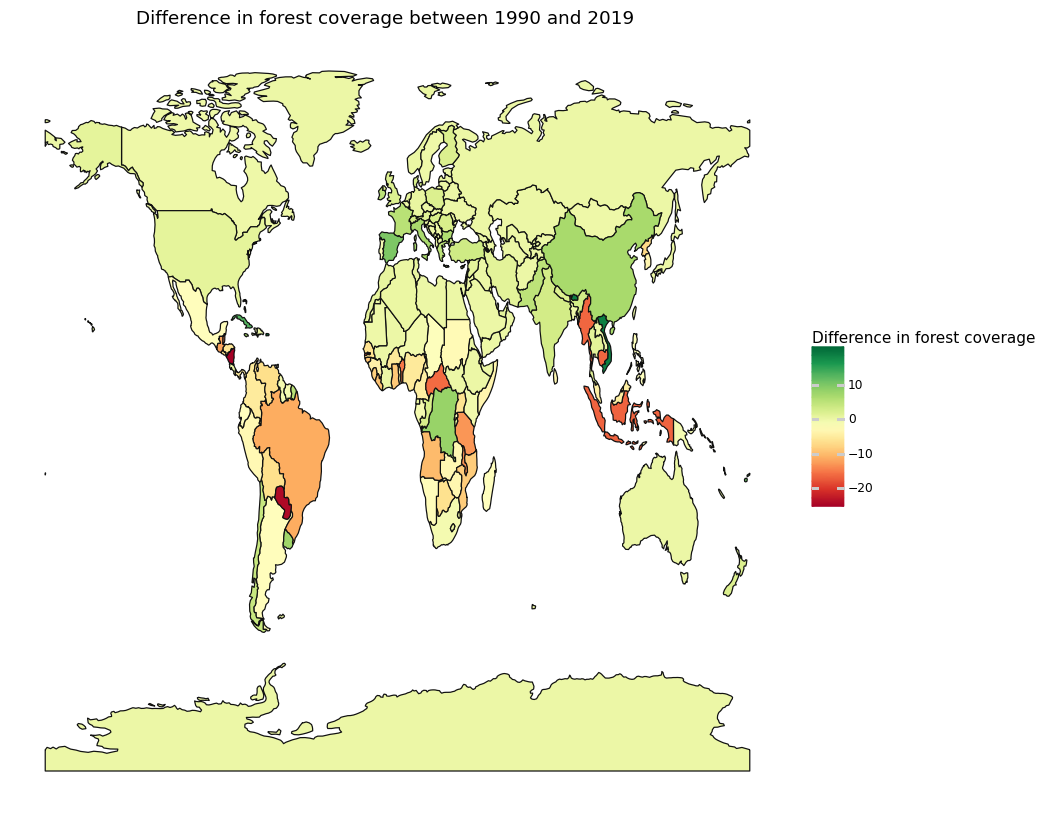

<ggplot: (156206150909)>

In [359]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
dff_90 = pd.read_csv('Forest_1990.csv')
dff_19 = pd.read_csv('Forest_2019.csv')

diff = pd.DataFrame(dff_19['Country'], columns=['Country'])
diff['diff'] = dff_19['2019_forest'] - dff_90['1990_forest']

countries_with_data = list(diff['Country'])

for c in world['name']:
    if c in countries_with_data:
        d = diff.loc[diff['Country']==c, 'diff']
        d = d.values[0]
        world.loc[world['name']==c, 'diff'] = d
    else:
        world.loc[world['name']==c, 'diff'] = 0
    
# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

p = (ggplot(world)
    + geom_map(aes(geometry='geometry', fill='diff'))
    + scale_fill_cmap('RdYlGn', name='Difference in forest coverage')
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank(),
            figure_size=(10,10))
    + labs(title='Difference in forest coverage between 1990 and 2019')
    
    
    )
p

In [ ]:
# Insert code here 
# Remember to print the visual 